<a href="https://colab.research.google.com/github/ValinStudent/CSC-481-Spring25/blob/main/Week_5_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [64]:
data = pd.read_csv("gila_river.csv")

In [65]:
data.head()

,y(t-1),y(t-2),y(t-3),y(t)
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [66]:
data.shape

(1034, 4)

In [67]:
X = data.drop(columns=['y(t)'])
y = data['y(t)']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
mlp = MLPRegressor(hidden_layer_sizes=(64,64),max_iter=3000)

In [71]:
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [72]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [73]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

In [74]:
print(f"Training MSE:{mse_train}")
print(f"Testing MSE:{mse_test}")

Training MSE:60573.19939342384
Testing MSE:24844.147992113143


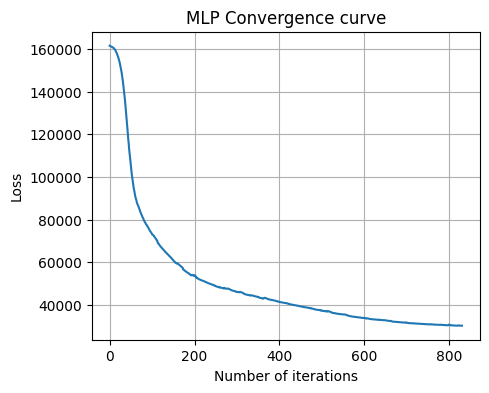

In [75]:
plt.figure(figsize=(5,4))
plt.plot(mlp.loss_curve_)
plt.title('MLP Convergence curve')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

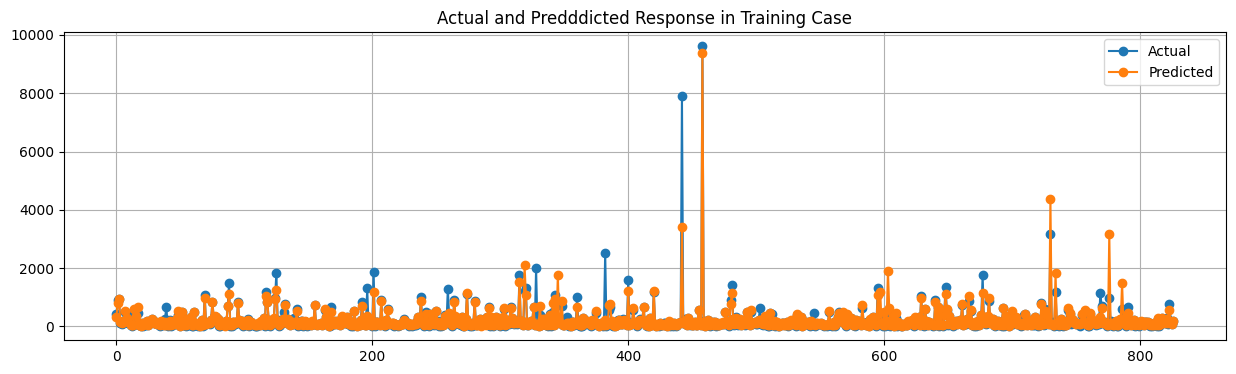

In [77]:
t = range(len(y_train))

plt.figure(figsize=(15,4))
plt.plot(t, y_train, label='Actual',linestyle='-',marker='o')
plt.plot(t, y_train_pred, label='Predicted',linestyle='-',marker='o')
plt.title('Actual and Predddicted Response in Training Case')
plt.legend()
plt.grid(True)

plt.show()

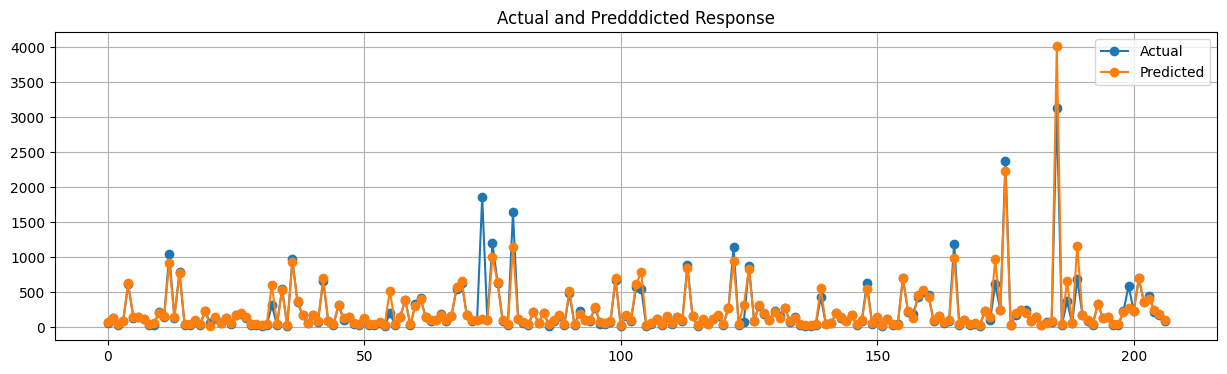

In [78]:
t = range(len(y_test))

plt.figure(figsize=(15,4))
plt.plot(t,y_test, label='Actual',linestyle='-',marker='o')
plt.plot(t,y_test_pred, label='Predicted',linestyle='-',marker='o')
plt.title('Actual and Predddicted Response')
plt.legend()
plt.grid(True)

plt.show()

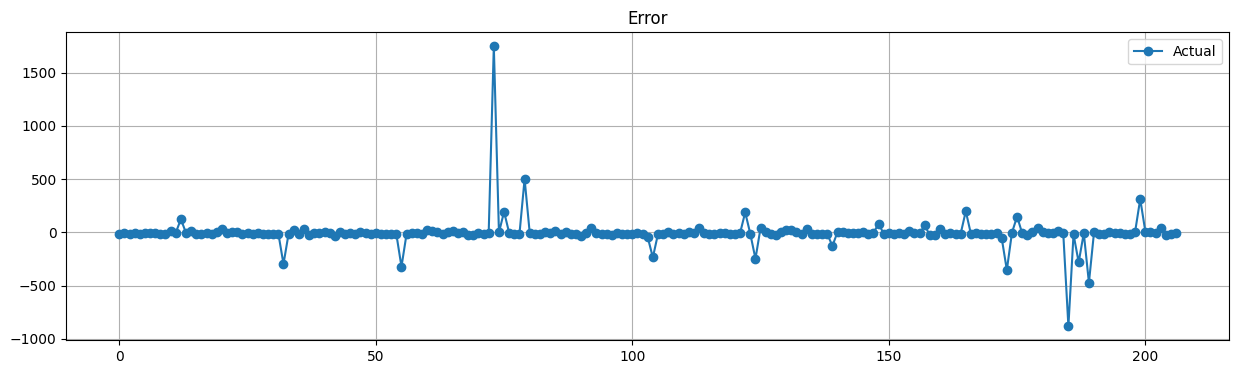

In [79]:
t = range(len(y_test))

plt.figure(figsize=(15,4))
plt.plot(t,y_test - y_test_pred, label='Actual',linestyle='-',marker='o')
plt.title('Error')
plt.legend()
plt.grid(True)

plt.show()